# Cardiovascular_Disease_Dataset
This heart disease dataset is acquired from one of the multispecialty hospitals in India. Over 14 common features make it one of the heart disease datasets available so far for research purposes. This dataset consists of 1000 subjects with 12 features. This dataset will be useful for building early-stage heart disease detection as well as for generating predictive machine-learning models.


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
# Import path of the file and read
df = pd.read_csv('C:/Users/Sha/Desktop/Yasmine/SQL/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
data = pd.DataFrame(df)
data.head(10)

In [ ]:
# DATA EXPLORATION

# The data.info() method in Pandas is used to provide a concise summary of a DataFrame.
#This summary is useful at the early stages of data exploration to understand the structure of the dataset, identify potential issues with missing values, and ensure that the data types are appropriate for further analysis.

data.info()

In [11]:
data.shape

(1000, 14)

In [12]:
#Descriptive Statistics:

#Use the describe() function to get an overview of the basic statistics for each numerical column (e.g., age, restingBP, serumcholestrol, maxheartrate, oldpeak).
#Check for the mean, standard deviation, minimum, maximum, and quartiles.

data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [14]:
### Check for Missing Values
data.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [15]:
##Remove unwanted columns
data = data.drop(['patientid'], axis=1)

In [16]:
data.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


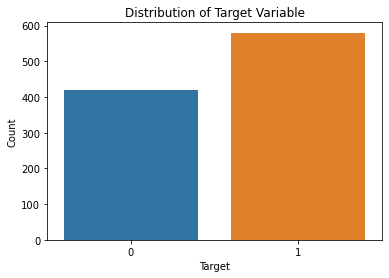

In [17]:
# Distribution of Target Variable (To understand the proportion of patients with and without cardiovascular disease.)
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#The dataset has more patients with cardiovascular disease.

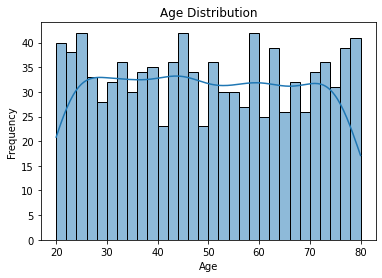

In [18]:
# Age Distribution
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# The Age distribution seems to be uniform

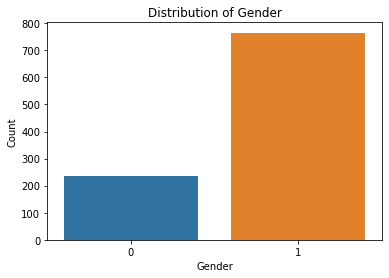

In [19]:
# Distribution of Gender
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Most of the patients are male, having cardio vascular disease (from the above plots).

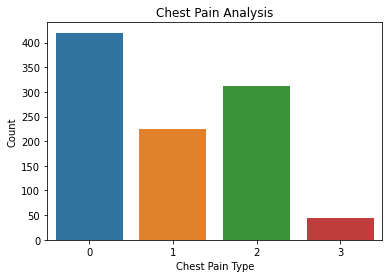

In [20]:
# Chest Pain Analysis
sns.countplot(x='chestpain', data=data)
plt.title('Chest Pain Analysis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# The chest pain analysis shows that most of patients have type 0 (typical angina), and 2 (non-anginal pain).

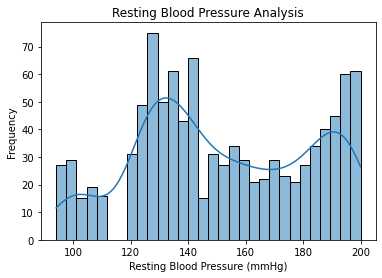

In [21]:
# Resting Blood Pressure (restingBP) Analysis
sns.histplot(data['restingBP'], bins=30, kde=True)
plt.title('Resting Blood Pressure Analysis')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()

# Histogram is multimodal.

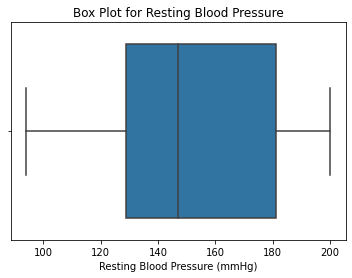

In [23]:
# Checking for outliers using Box plot: resting blood pressure
sns.boxplot(x='restingBP', data=data)
plt.title('Box Plot for Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.show()

# No visible outliers in the Box plot

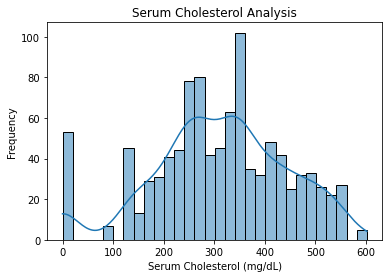

In [29]:
# Serum Cholesterol Analysis
sns.histplot(data['serumcholestrol'], bins=30, kde=True)
plt.title('Serum Cholesterol Analysis')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

#Serum Cholesterol Analysis shows a slightly normal distribution.

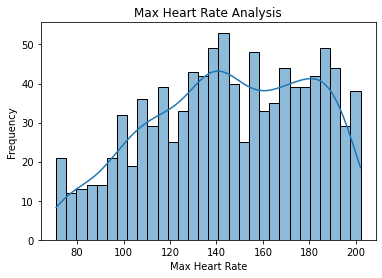

In [30]:
# Max Heart Rate Analysis
sns.histplot(data['maxheartrate'], bins=30, kde=True)
plt.title('Max Heart Rate Analysis')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

# Histogram is left or negative skewed and bimodal

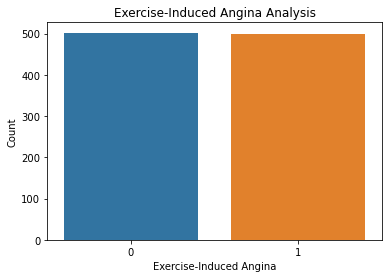

In [31]:
# Exercise-Induced Angina Analysis
sns.countplot(x='exerciseangia', data=data)
plt.title('Exercise-Induced Angina Analysis')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

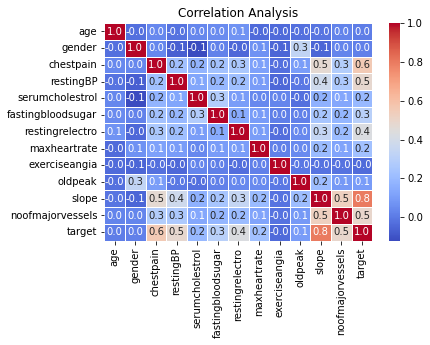

In [35]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5, fmt=".1f")
plt.title('Correlation Analysis')
plt.show()

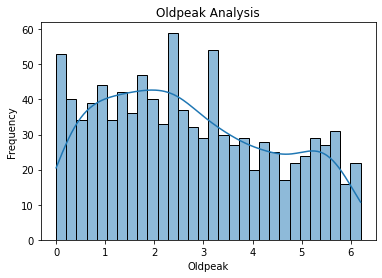

In [40]:
# Oldpeak and Slope Analysis
sns.histplot(data['oldpeak'], bins=30, kde=True)
plt.title('Oldpeak Analysis')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

##Histogram is positive skewed and bimodal

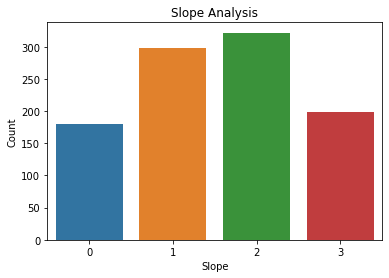

In [39]:
#Slope Analysis

sns.countplot(x='slope', data=data)
plt.title('Slope Analysis')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

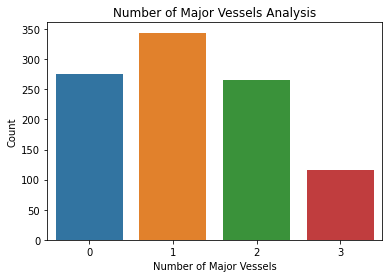

In [37]:
# Number of Major Vessels Analysis
sns.countplot(x='noofmajorvessels', data=data)
plt.title('Number of Major Vessels Analysis')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()
## More than 300 patients have one major vessel affected and near to 100 have 3 major vessels affected.

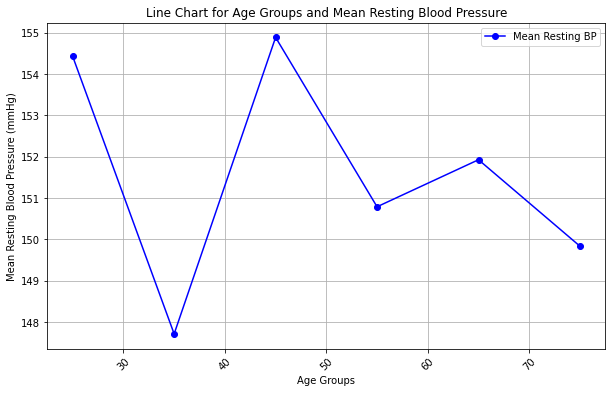

In [43]:
### Age Vs Resting Blood Pressure

# Create age bins of width 10
age_bins = range(20, 90, 10)
data['age_group'] = pd.cut(data['age'], bins=age_bins, right=False)

# Convert interval midpoints to numeric values
data['age_group_midpoint'] = data['age_group'].apply(lambda x: x.mid)

# Group by age group midpoint and calculate the mean resting blood pressure
grouped_data = data.groupby('age_group_midpoint')['restingBP'].mean().reset_index()

# Line chart for Age Groups and Mean Resting Blood Pressure
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['age_group_midpoint'], grouped_data['restingBP'], marker='o', linestyle='-', color='b', label='Mean Resting BP')
plt.title('Line Chart for Age Groups and Mean Resting Blood Pressure')
plt.xlabel('Age Groups')
plt.ylabel('Mean Resting Blood Pressure (mmHg)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

# Mean Resting Blood Pressure is high in age group 40-50

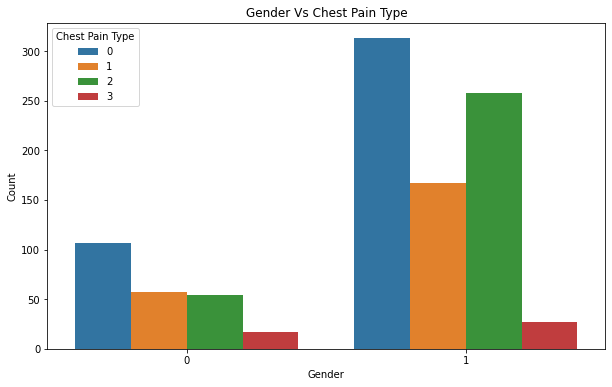

In [45]:
### Gender Vs Chest Pain Type
# Create a bar chart for Gender and Chest Pain Types
plt.figure(figsize=(10, 6))


sns.countplot(x='gender', hue='chestpain', data=data)

plt.title('Gender Vs Chest Pain Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type')
plt.show()





#Both Male and females have Chest pain type 0 highest and type 3 lowest. But Males have Type 2 chances more than Type 1 and females have almost similar chance to get type 1 oe type 2 chest pain. 